원래는 캘리포니아가 아니라 보스턴 집값데이터를 썼음 -> 더 좋지만 인종차별 문제로 안씀

# 캘리포니아 집값 데이터

> 집값('median_house_value')을 예측하세요. -> 회귀문제

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
housing = pd.read_csv('data/housing.csv')

In [17]:
print('\n데이터 정보: ')
print(housing.info())
print('\n데이터 통계: ')
print(housing.describe())
# 판다스의 object는 웬만하면 string


데이터 정보: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

데이터 통계: 
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.

In [9]:
print('\n결측치 개수: ')
print(housing.isnull().sum())


결측치 개수: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_11152\3859319775.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


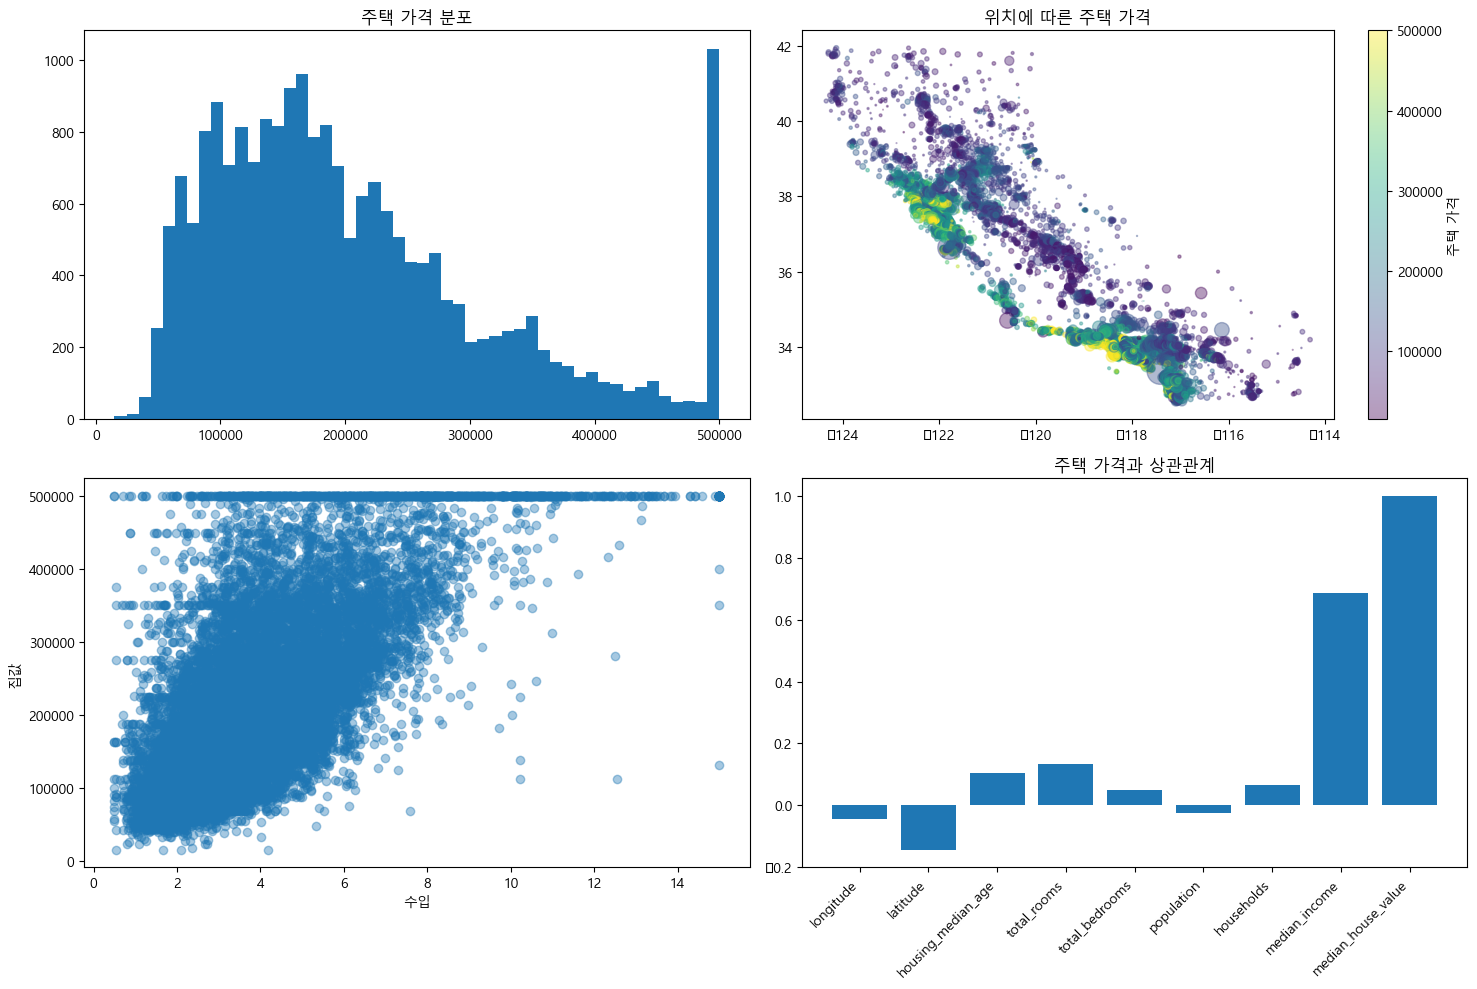

In [22]:
# 시각자료는 뭉쳐야함
# 시각자료를 분석하여 목표를 세움
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.hist(housing['median_house_value'], bins=50)
plt.title('주택 가격 분포')

plt.subplot(2, 2, 2)
plt.scatter(housing['longitude'], housing['latitude'], 
            alpha=0.4, s=housing['population']/100, c=housing['median_house_value'], cmap='viridis')
plt.colorbar(label='주택 가격')
plt.title('위치에 따른 주택 가격')

plt.subplot(2, 2, 3)
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.4)
plt.xlabel('수입')
plt.ylabel('집값')

corr = housing.corr(numeric_only=True)
plt.subplot(2, 2, 4)
plt.bar(corr['median_house_value'].index, corr['median_house_value'].values)
plt.title('주택 가격과 상관관계')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [23]:
X = housing.drop('median_house_value', axis=1)
y= housing['median_house_value']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
numerical_feat = X.select_dtypes(include=['int64', 'float64']).columns # 데이터는 float로 변경( 원핫인코딩 제외)
categorical_feat = ['ocean_proximity']

In [ ]:
from sklearn.impute import SimpleImputer # 비어있는걸 쉽게 채워넣기(시간촉박할때 결과만 볼때)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # 순서가 중요
# numerical_feat
# SimpleImputer
# StandardScaler

In [29]:
numerical_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [35]:
from sklearn.preprocessing import OneHotEncoder
# ❗매개변수 ##괄호 복잡하면 괄호안을 미리 구성해서 실행하고 안에 넣기
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

``` 모델학습이 끝나면 무조건 파일을 꺼내고 부를 것이다. 모델과 추론을 분리 ```

In [ ]:
from sklearn.compose import ColumnTransformer # 파이프라인 묶어줌
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_feat),
                                                ('cat', categorical_transformer, categorical_feat)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

In [42]:
from sklearn.linear_model import LinearRegression
linear_model = Pipeline([('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
linear_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('regressor', LinearRegression())])

In [43]:
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([  54811.88242313,  123864.33890936,  252845.43705076,  267672.3775131 ,  263557.09245358,  137744.50976215,  291220.33225498,  228912.64503799,  255577.88885392,  407450.79416431,  119388.15403654,  176932.43488341,   47721.55238367,  146328.76411968,  248491.82798737,   48903.81752599,  269690.28152261,  208156.50309902,  238031.05460498,  113499.22197239,  262540.94327533,  272274.16576698,  155640.60507478,  313608.47943136,  193728.90165867,   75312.85624173,  128336.37089356,  232285.4654809 ,  158589.17373405,  331900.55037252,  166607.29261625,  153103.87215871,  201453.66857178,  376486.52482562,  249119.40955754,  124412.9198245 ,  300459.43851943,  181671.55068005,  148522.21337419,  201652.13941608,  262479.75957864,  157211.98667903,  120520.90745428,  172339.74650558,  122204.74544367,  155474.89452431,  218420.40682338,  195629.95442487,  219561.73137574,  161397.01622131,  255807.14066435,  154628.70159654,  216285.14620293,   72806.49332055,  166021.06352658,  18